In [19]:
import scipy as sc
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [8]:
#DRV
xk = (1,2,3,4,5)
pk = (0.1, 0.2, 0.3, 0.2, 0.2)
custm=st.rv_discrete(name='custm', values=(xk, pk))

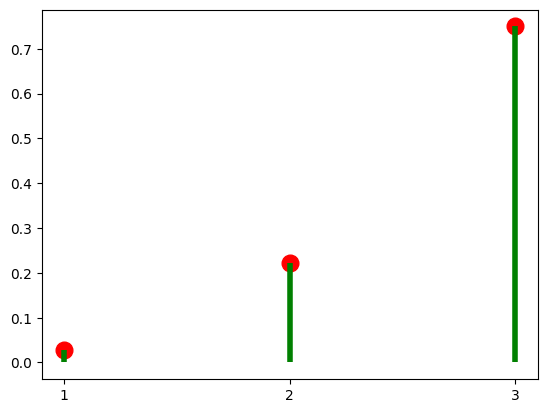

In [97]:
# Define xk and pk
xk = (1, 2, 3)
pk = tuple((i**3)/36 for i in xk) 

# Create a custom discrete distribution
custm = st.rv_discrete(name='custm', values=(xk, pk))

# Create a plot
fig, ax = plt.subplots(1, 1)

# Plot the PMF as red dots with specified size and color
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')

# Plot vertical lines from the x-axis to the PMF values
ax.vlines(xk, 0, custm.pmf(xk), colors='g', lw=4)

# Ensure the x-axis only shows values in xk
ax.set_xticks(xk)

# Show the plot
plt.show()


In [27]:
# Define xk and pk
xk = (1, 2, 3)
pk = tuple((i**3)/36 for i in xk) 

# Create a custom discrete distribution
custm = st.rv_discrete(name='custm', values=(xk, pk))

# Mean of the distribution, rounded to 4 decimal places
mean = round(custm.mean(), 4)
print(f"Mean: {mean}")

# Variance of the distribution, rounded to 4 decimal places
variance = round(custm.var(), 4)
print(f"Variance: {variance}")

# Standard deviation of the distribution, rounded to 4 decimal places
std_dev = round(custm.std(), 4)
print(f"Standard Deviation: {std_dev}")

# Skewness of the distribution, rounded to 4 decimal places
skewness = round(custm.stats(moments='s'), 4)
print(f"Skewness: {skewness}")

# Kurtosis of the distribution, rounded to 4 decimal places
kurtosis = round(custm.stats(moments='k'), 4)
print(f"Kurtosis: {kurtosis}")


Mean: 2.7222
Variance: 0.2562
Standard Deviation: 0.5061
Skewness: -1.616
Kurtosis: 1.7132


In [90]:
#Example 1
class custom_dist(st.rv_continuous):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)

    def _pdf(self,x):
        return 4*x**3

    def _support(self):
        return (0,1)

dist=custom_dist(name="my_PDF")

In [ ]:
x=np.linspace(0,1,1000)
y=dist.pdf(x)

plt.plot(x,y,label="my_PDF")
plt.title("Arbitrary PDF")
plt.xlabel("X")
plt.ylabel("Density")
plt.show()

In [ ]:
#mean of the RV
quad(lambda x: x*dist.pdf(x),0,1)

In [ ]:
#Variance of the RV: E(X^2)-E(X)^2
quad(lambda x: x**2*dist.pdf(x),0,1)[0]-quad(lambda x: x*dist.pdf(x),0,1)[0]**2

In [90]:
#Example 2
class custom_dist(st.rv_continuous):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)

    def _pdf(self,x):
        return 10/(x**2)

    def _support(self):
        return (10,inf)

dist=custom_dist(name="my_PDF")

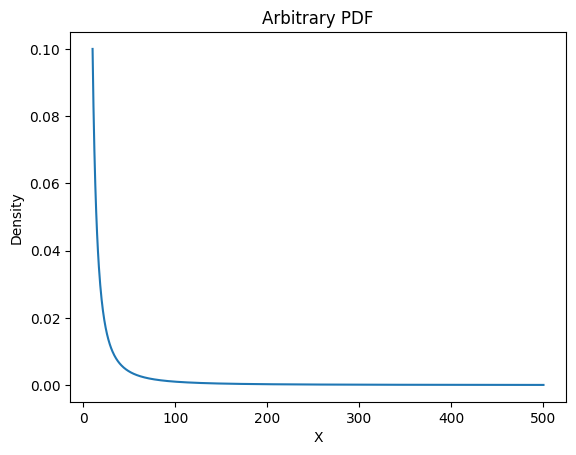

In [93]:
x=np.linspace(10,500,1000)
y=dist.pdf(x)

plt.plot(x,y,label="my_PDF")
plt.title("Arbitrary PDF")
plt.xlabel("X")
plt.ylabel("Density")
plt.show()

In [95]:
#mean of the RV
quad(lambda x: x*dist.pdf(x),10,np.inf)

C:\Users\Subbi.DESKTOP-L4TAD5C\AppData\Local\Temp\ipykernel_10172\4235786694.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad(lambda x: x*dist.pdf(x),10,np.inf)


(386.9342772617544, 81.56214940494941)

In [96]:
#Variance of the RV: E(X^2)-E(X)^2
quad(lambda x: x**2*dist.pdf(x),10,np.inf)[0]-quad(lambda x: x*dist.pdf(x),10,np.inf)[0]**2

C:\Users\Subbi.DESKTOP-L4TAD5C\AppData\Local\Temp\ipykernel_10172\1370255771.py:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad(lambda x: x**2*dist.pdf(x),10,np.inf)[0]-quad(lambda x: x*dist.pdf(x),10,np.inf)[0]**2
C:\Users\Subbi.DESKTOP-L4TAD5C\AppData\Local\Temp\ipykernel_10172\1370255771.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad(lambda x: x**2*dist.pdf(x),10,np.inf)[0]-quad(lambda x: x*dist.pdf(x),10,np.inf)[0]**2


-149728.13492007623

In [80]:
#Example 3
class triangle_dist(st.rv_continuous):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def _pdf(self, x):
        # Handle the case when x is a NumPy array or scalar
        x = np.asarray(x)  # Ensure x is an array for vectorized operations
        pdf_values = np.zeros_like(x)  # Default value is 0
        
        # Apply the piecewise conditions
        pdf_values[(0 <= x) & (x <= 1)] = x[(0 <= x) & (x <= 1)]  # PDF = x for 0 <= x <= 1
        pdf_values[(1 < x) & (x <= 2)] = 2 - x[(1 < x) & (x <= 2)]  # PDF = 2 - x for 1 < x <= 2
        
        return pdf_values

    def _support(self):
        return (0, 2)

# Initialize the custom triangular distribution
tri_dist = triangle_dist(name="Triangular_PDF")

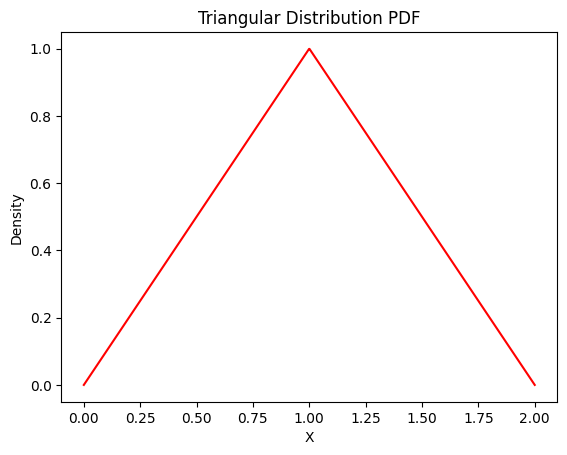

In [83]:
x1=np.linspace(0,2,1000)
y1=tri_dist.pdf(x1)
plt.plot(x1,y1,label="Triangular PDF",color="r")
plt.title("Triangular Distribution PDF")
plt.xlabel("X")
plt.ylabel("Density")
plt.show()

In [89]:
#mean of the RV
mean_X=quad(lambda x: x*tri_dist.pdf(x),0,2)[0]
round(mean_X,4)

1.0

In [86]:
#Variance of the RV: E(X^2)-E(X)^2
var_X=quad(lambda x: x**2*tri_dist.pdf(x),0,1)[0]-quad(lambda x: x*tri_dist.pdf(x),0,1)[0]**2
round(var_X,4)

0.1389

In [98]:
quad(lambda x: x**2,0,1)[0]

0.33333333333333337